# Seasonal Gasoline Price Analysis

## Objective
The objective of this notebook is to analyze how gasoline prices for Regular, Midgrade, and Premium gasoline fluctuate seasonally. We aim to understand the price dynamics over different seasons and across different gasoline grades.

## Data Loading and Preprocessing
- **Data Sources**: We utilized three CSV files containing data on Regular, Midgrade, and Premium gasoline prices.
- **Preprocessing Steps**:
  - Load the data from CSV files, skipping the first row which does not contain relevant data.
  - Assign meaningful column names based on the data structure.
  - Convert the 'Date' column to datetime format for better manipulation.
  - Drop rows with invalid date entries.
  - Convert the 'National Average' price column to numeric for aggregation.
  - Map each date to a corresponding season (Winter, Spring, Summer, Fall) based on the month.

## Seasonal Analysis
- **Season Mapping**:
  - December to February: Winter
  - March to May: Spring
  - June to August: Summer
  - September to November: Fall
- **Average Price Calculation**: Compute the average price for each season across all years for each type of gasoline.

## Results
- **Seasonal Trends**:
  - **Summer** showed the highest prices across all types of gasoline, likely due to increased travel demand.
  - **Winter** generally had the lowest prices, possibly reflecting lower travel activity.
- **Comparison Across Gasoline Grades**:
  - Regular, Midgrade, and Premium gasoline prices all followed similar seasonal patterns, with Premium gasoline consistently being the most expensive and Regular the least.

## Visualizations
- Plotted the seasonal average prices for each type of gasoline to visually assess the trends and compare them across the different grades.

## Conclusion
The analysis confirms that gasoline prices exhibit clear seasonal trends, with higher prices in the summer and lower prices in the winter. These insights could be useful for budget planning, economic analysis, and understanding consumer behavior related to travel and fuel consumption.


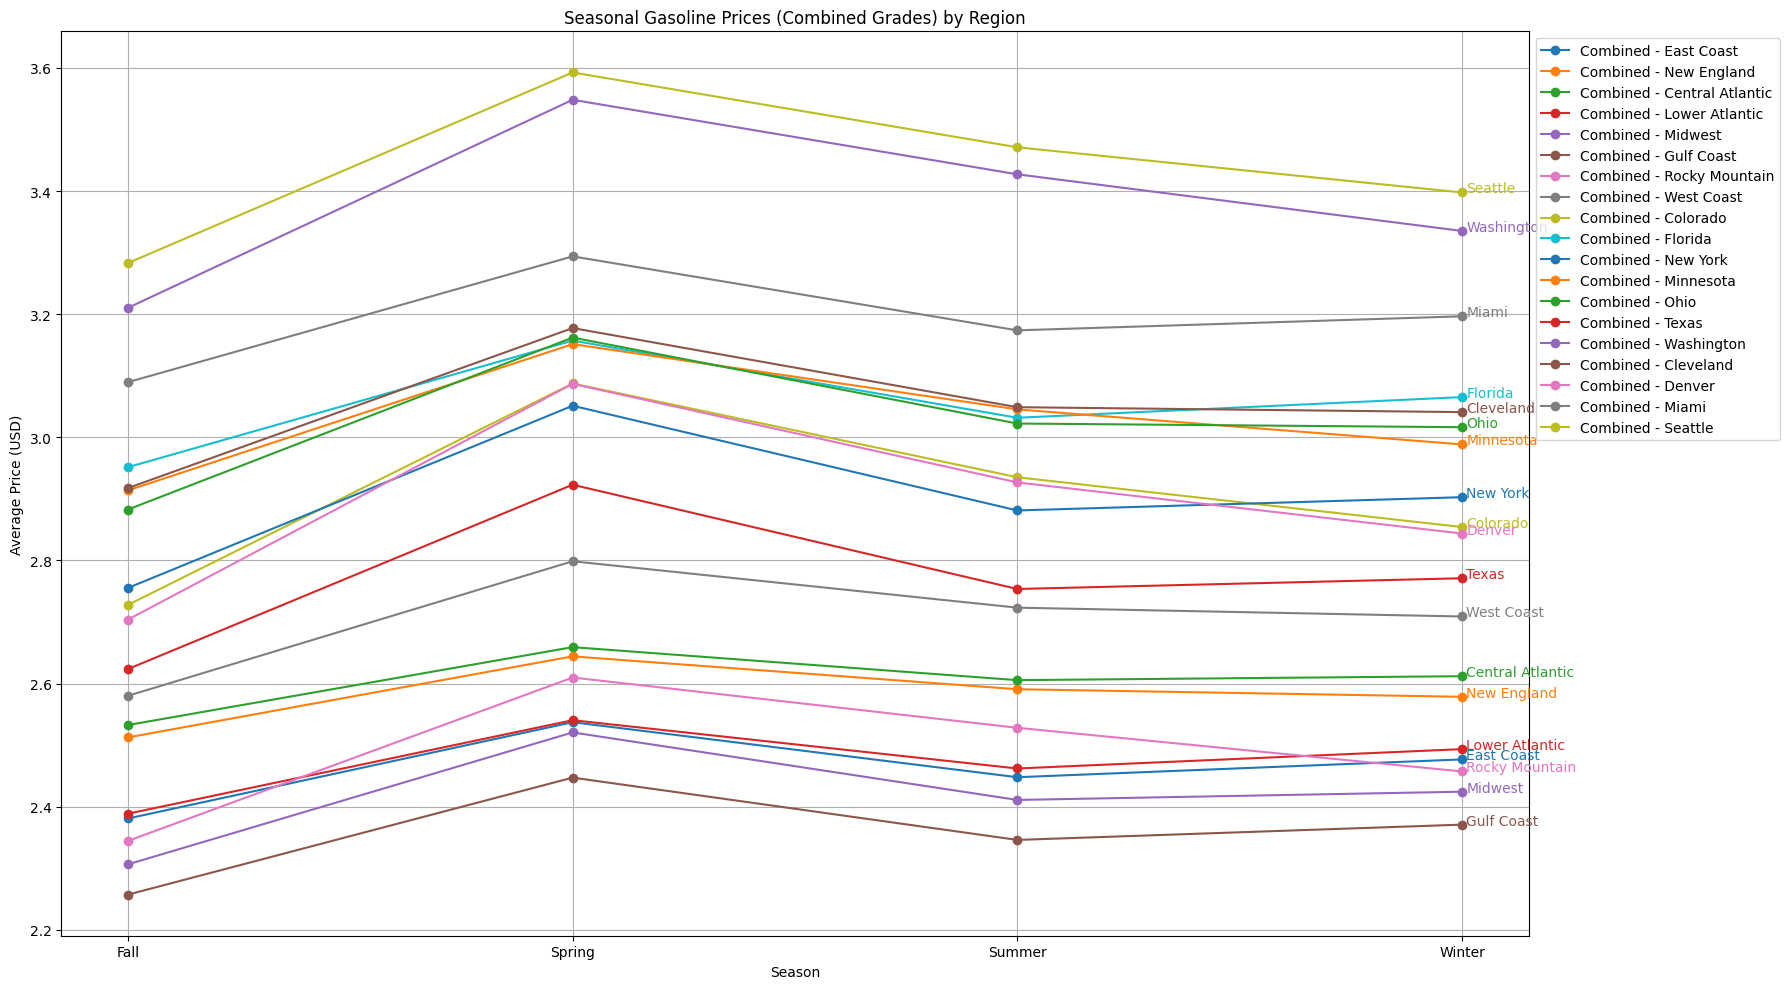

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to map months to seasons
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Load and preprocess data
def load_and_preprocess(file_path, region_names):
    data = pd.read_csv(file_path, skiprows=2)
    data = data.iloc[:, :-1] if 'Unnamed' in data.columns[-1] else data
    data.columns = ['Date', 'National Average'] + region_names
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    data = data.dropna(subset=['Date'])
    data['National Average'] = pd.to_numeric(data['National Average'], errors='coerce')
    for region in region_names:
        data[region] = pd.to_numeric(data[region], errors='coerce')
    data['Season'] = data['Date'].dt.month.apply(month_to_season)
    return data

# Define file paths and load data
data1_path = 'Data/Data1_Regular_Conventional.csv'
data2_path = 'Data/Data4_Midgrade_Conventional.csv'
data3_path = 'Data/Data7_Premuim_Conventional.csv'

data1 = load_and_preprocess(data1_path, short_region_names)
data2 = load_and_preprocess(data2_path, short_region_names)
data3 = load_and_preprocess(data3_path, short_region_names)

# Combine the data
combined_data = data1.copy()
for region in short_region_names:
    combined_data[region] = (data1[region] + data2[region] + data3[region]) / 3

# Calculate seasonal averages for combined grades
seasonal_averages_combined = combined_data.groupby('Season').mean()

# Function for plotting combined data
def plot_combined_data(seasonal_data, region_names):
    plt.figure(figsize=(18, 10))
    for region in region_names:
        data_to_plot = seasonal_data.tail(12)[region]
        line = plt.plot(data_to_plot.index, data_to_plot, label=f'Combined - {region}', marker='o')
        plt.annotate(region, 
                     xy=(data_to_plot.index[-1], data_to_plot.iloc[-1]),
                     xytext=(3, 0), 
                     textcoords='offset points',
                     color=line[0].get_color(), 
                     ha='left')

    plt.title('Seasonal Gasoline Prices (Combined Grades) by Region')
    plt.xlabel('Season')
    plt.ylabel('Average Price (USD)')
    plt.xticks(list(seasonal_data.tail(12).index))  # Ensure only last 12 seasons are shown
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()  # Adjust layout
    plt.show()

# Plot the combined data
plot_combined_data(seasonal_averages_combined, short_region_names)
